# <span style="color:rebeccapurple">Setup</span>

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# <span style="color:rebeccapurple">Feature vs Target split</span>

In [7]:
# data load
df = pd.read_csv("data/iris_numeric.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,NaN,1.4,0.2,0


Once the problem statement is defined, the data can be split into target labels and input features as below.

In [12]:
X = df.drop(columns="target")
df.shape, X.shape

((150, 5), (150, 4))

In [13]:
y = df["target"]
y.shape

(150,)

# <span style="color:rebeccapurple">Train-test split</span>

An important aspect of machine learning that sets itself apart from fields like optimization is that in addition to the training error, we want to minimize the generalization error. In other words, we want to make sure that the trained model generalizes well to unobserved/future inputs. That is why we need to split our dataset into train and test set.

These 2 sets should be disjoint, i.e., one instance shouldn't be in both sets. (When dataset is too small, there are special measures but we will not cover here.)

The typical split is 80%-20% for train vs test set. In sklearn it is defaulted to 75-25 (or more accurately 0.75-0.25).

The train dataset is used to learn the model. The test dataset is used to estimate generalization error.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
X_train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,119.000000,119.000000,120.000000
mean,5.880833,3.048739,3.835294,1.231667
std,0.850437,0.430779,1.779620,0.775354
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


Important note: preprocessing should be fit to train dataset, instead of applying to the whole set, to avoid leakage of information. Data leakage essentially means that the training process has information about, and thus will create a bias toward, the test set, potentially leading to a deceptively good generalization result.

After the preprocessor learns to fit to and transform the train dataset, it is then used to fit (only) to the test set. More specifically, in the case of standardization,the preprocessor will obtain the mean and standard deviation of the train set and use those statistics to transform the test set. As a result, after the transformation, the train set will definitely have 0 mean and unit standard deviation but the test set may not.

# <span style="color:rebeccapurple">Data Pre-processing</span>

Raw data can take on any range of values. By preprocessing data, we make it easier to interpret and use.
There are many ways to preproccess data for ML, depending on the modeling purpose and data characteristics.

We're going to discuss methods to deal with these three types of data:

* Numerical
* Categorical
* Missing

### <span style="color:#1409FA">Scaling Numerical data</span>
Several machine learning algorithms rely on calculating distances. Therefore, it is important to have all the input features on the same scale - so that the distances computed for different features are comparable.

#### <span style="color:teal">Standardization</span>
This is the process of converting data into the standard format where each feature has zero mean and unit variance (i.e., std=1).
$$ x' = \frac{x - \mu}{\sigma}$$

In [20]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [22]:
# scaler is an object of class StandardScaler
scaler = StandardScaler()

In [25]:
# scaling the data
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

In [31]:
scaled_X_train

array([[-0.31699245, -1.32619491,  0.07470002, -0.13206311],
       [ 2.06897222, -0.1454998 ,  1.2920336 ,  1.40653626],
       [ 0.47832911,  0.56291726,  0.51736677,  0.50901996],
       [-0.43060981, -1.56233393,  0.01936667, -0.13206311],
       [ 0.47832911, -0.85391687,  0.62803346,  0.76545319],
       [ 0.47832911, -0.61777784,  0.73870015,  0.38080334],
       [-1.11231401, -1.32619491,  0.40670008,  0.63723657],
       [ 0.47832911, -1.32619491,  0.68336681,  0.8936698 ],
       [ 1.27365067,  0.32677824,  0.51736677,  0.25258673],
       [ 0.70556384, -0.1454998 ,  0.7940335 ,  1.02188642],
       [ 0.13747701,  0.79905629,  0.40670008,  0.50901996],
       [-1.22593137,  0.09063922, -1.19796691, -1.28601264],
       [-0.08975772, -0.85391687,  0.73870015,  0.8936698 ],
       [-0.31699245, -0.85391687,  0.24070005,  0.12437012],
       [-0.31699245, -0.38163882, -0.09130002,  0.12437012],
       [-0.43060981, -1.32619491,  0.13003336,  0.12437012],
       [ 0.25109438, -0.

In [32]:
# convert array to df
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)

In [35]:
display(X_train.head(2))
display(scaled_X_train.head(2))

,sepal_length,sepal_width,petal_length,petal_width
69,5.6,2.5,3.9,1.1
135,7.7,3.0,6.1,2.3


,sepal_length,sepal_width,petal_length,petal_width
0,-0.316992,-1.326195,0.074700,-0.132063
1,2.068972,-0.145500,1.292034,1.406536


#### <span style="color:teal">Scaling features to a range</span>
Apart from standardization, we can scale features to lie between a given minimum and maximum value, often between zero and one. Range compression helps with robustness due to small standard deviations of features after scaling and at the same time preserves zero entries.
$$ x' = \frac{x - min}{max - min} $$

In [36]:
from sklearn.preprocessing import MinMaxScaler

#### <span style="color:teal">Normalization</span>
This is the process of scaling individual samples to have unit norm. So far, we have scaled data by features i.e., calculations are applied on individual columns. Sometimes, we need to scale data across rows. For example, clustering requires normalization to calculate cosine similarity scores.

In [133]:
from sklearn.preprocessing import Normalizer

### <span style="color:#1409FA">Encoding Categorical data</span>
Data sometimes come in non-numeric values in predictors and/or response.

In [37]:
df = pd.read_csv('data/breast_cancer.csv')
df.head()

,target,age,tumor-size,deg_malig,side,quad,irradiat
0,no-recurrence-events,30-39,30-34,3,left,left_low,no
1,no-recurrence-events,40-49,20-24,2,right,right_up,no
2,no-recurrence-events,40-49,20-24,2,left,left_low,no
3,no-recurrence-events,60-69,15-19,2,right,left_up,no
4,no-recurrence-events,40-49,0-4,2,right,right_low,no


<span style="color:#DC537D"><font size="+2">Which features in the dataset above are categorical?</font></span>

#### <span style="color:teal">Ordinal encoding</span>
This is the process of assigning each unique category an integer value. Doing this, we impose a natural ordered relationship between each category.

For example, age is ordered in nature and we can map the different ranges to integer values. More specifically, 30-39 => 0, 40-49 =>1, 50-59 => 2, etc.

In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
# load the raw data
df = pd.read_csv('data/breast_cancer.csv')

In [69]:
# encode the "age" feature
age_encoder = OrdinalEncoder().fit(df[["age"]])

In [70]:
# how many categories were encoded?
age_encoder.categories_

[array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object)]

In [71]:
df["scaled_age"] = age_encoder.transform(df[["age"]])
df.head(2)

,target,age,tumor-size,deg_malig,side,quad,irradiat,scaled_age
0,no-recurrence-events,30-39,30-34,3,left,left_low,no,1.0
1,no-recurrence-events,40-49,20-24,2,right,right_up,no,2.0


#### <span style="color:teal">One-hot encoding</span>
When there is no natural ordinal relationship among different categories, OrdinalEncoder is not an appropriate approach.

In addition, when the response variable has no ordinal relationship, encoding its labels as ordered integer values can result in poor performance. For example, suppose we encode the response's labels as 0, 1, 2. The algorithm can return a prediction of 1.5.

One-hot encoding is the process of transforming each label of the orginal categorical variable into a new binary variable. This means the total number of features will increase after preprocessing.

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
# load raw data
df = pd.read_csv('data/breast_cancer.csv')

# encode age with OHE
age_ohe = OneHotEncoder().fit(df[["age"]])

# check categories
age_ohe.categories_

[array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object)]

In [74]:
age_ohe_transformed = age_ohe.transform(df[["age"]])
age_ohe_transformed.shape

(285, 6)

Results from OneHotEncoder are saved as scipy sparse matrix format. We can obtain the actual values using the toarray() method.

In [75]:
age_ohe_transformed.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [76]:
# convert to a dataframe
age_ohe_dataframe = pd.DataFrame(data = age_ohe_transformed.toarray(),
                                columns=age_ohe.categories_)
age_ohe_dataframe.head(2)

,20-29,30-39,40-49,50-59,60-69,70-79
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
# pandas - get dummies - easy to use, but not suggested
ohe_age_df = pd.get_dummies(df.age, prefix='age')
ohe_age_df.head()

,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [83]:
# bind the two dataframes together
df_ohe = df.join(ohe_age_df)
df_ohe.head(2)

,target,age,tumor-size,deg_malig,side,quad,irradiat,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79
0,no-recurrence-events,30-39,30-34,3,left,left_low,no,0,1,0,0,0,0
1,no-recurrence-events,40-49,20-24,2,right,right_up,no,0,0,1,0,0,0


#### <span style="color:teal">Label encoding</span>
sklearn has a separate module to encode the target variable.

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder().fit(df['target'])

In [88]:
le.classes_

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [89]:
target_transformed = le.transform(df['target'])

In [90]:
target_transformed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### <span style="color:#1409FA">Imputing Missing data</span>
Sometimes, your data will have missing values (NaN).

In [91]:
df = pd.read_csv('data/iris_numeric.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,NaN,1.4,0.2,0


Note that we use the dataset with transformed target labels here. If we apply sklearn transformer on the entire dataset and there are non-numeric values, Python will raise an error.

We can check if there is any missing value in the entire dataset

In [148]:
# check the entire dataset
df.isna().values.any()

True

In [149]:
# check individual columns
df.isna().any()

sepal_length    False
sepal_width      True
petal_length     True
petal_width     False
target          False
dtype: bool

We can get the specific rows with missing values

In [150]:
df[df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,target
4,5.0,NaN,1.4,0.2,0
10,5.4,3.7,NaN,0.2,0


There are several approaches to imputing missing values before building an estimator. We will explore the most simple approach which involves replacing the missing values with

* constant values
* statistics like mean, median, mode

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
# impute a constant value
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.).fit_transform(df)

In [95]:
df_transformed_const = pd.DataFrame(imp_const, columns=df.columns)
df_transformed_const.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
target          False
dtype: bool

# <span style="color:rebeccapurple">Supervised learning - Linear regression</span>

Linear regression model is typically
$$\begin{align}
y = \beta_0 + \sum_{i=1}^N \beta_i x_i
\end{align}$$
where $y$ is the output, $x_i$ are the predictors and $N$ is the number of predictors. What we want to learn is the set of parameters, or weights, $\beta_i, i=0,...N$.

To learn these parameters, sklearn will minimize the residual sum of squares
$$
RSS = (y_{pred} - y_{obs})^2 = (\beta_0 + \sum_{i=1}^N \beta_i x_i - y_{obs})^2
$$
where $M$ is the number of observations.

### I. Data import

In [2]:
# Import a dataset
df = pd.read_csv("data/fish.csv")
df.head()

,species,vertical_len,diag_len,cross_len,height,width,weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


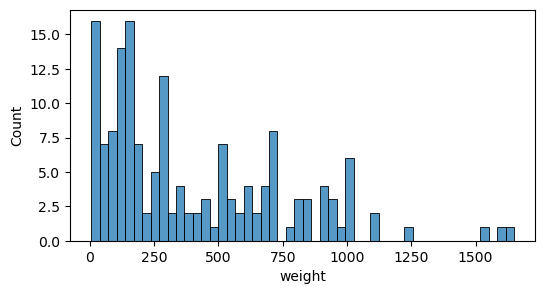

In [77]:
plt.figure(figsize=(6,3))
sns.histplot(df.weight, bins=50)
plt.show()

In [78]:
df.groupby("species").mean()

,vertical_len,diag_len,cross_len,height,width,weight
species,,,,,,
Bream,30.305714,33.108571,38.354286,15.183211,5.427614,617.828571
Parkki,18.727273,20.345455,22.790909,8.962427,3.220736,154.818182
Perch,25.735714,27.892857,29.571429,7.861870,4.745723,382.239286
Pike,42.476471,45.482353,48.717647,7.713771,5.086382,718.705882
Roach,20.731579,22.368421,25.084211,6.706353,3.673968,160.052632
Smelt,11.257143,11.921429,13.035714,2.209371,1.340093,11.178571
Whitefish,28.800000,31.316667,34.316667,10.027167,5.473050,531.000000


### II. Feature - target split

Suppose we want to predict the weight (in log space) of a fish. We will build a model with the remaining features as predictors.

In [3]:
# separate the input features and the target variable
X = df.drop(columns="weight")
y = np.log(df.weight) # predicting weight in log-scale

X.shape, y.shape

((158, 6), (158,))

### III. Train - test split
Ideally you would split your data into train and test sets before modeling.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((110, 6), (48, 6), (110,), (48,))

### IV. Data pre-processing
Then you would standardize the numeric columns and encode the categorical columns.

In [81]:
# process the nnumeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# select the numeric columns and fit them
numeric_cols = ['vertical_len', 'diag_len', 'cross_len', 'height', 'width']
scaler.fit(X_train[numeric_cols])

# get the transformed X_train and X_test data
numeric_X_train = scaler.transform(X_train[numeric_cols])
numeric_X_test  = scaler.transform(X_test[numeric_cols])

numeric_X_train.shape, numeric_X_test.shape

((110, 5), (48, 5))

In [82]:
# process the categorical columns
from sklearn.preprocessing import OneHotEncoder

species_ohe = OneHotEncoder()          # generate instance
species_ohe.fit(X_train[["species"]])  # fit the encoder

ohe_X_train = species_ohe.transform(X_train[["species"]]) # transform train set
ohe_X_test = species_ohe.transform(X_test[["species"]])   # transform test set

# convert to array
ohe_X_train = ohe_X_train.toarray()
ohe_X_test = ohe_X_test.toarray()

ohe_X_train.shape, ohe_X_test.shape

((110, 7), (48, 7))

In [83]:
# use hstack to join the processed columns together
processed_X_train = np.hstack((numeric_X_train, ohe_X_train))
processed_X_test = np.hstack((numeric_X_test, ohe_X_test))

processed_X_train.shape, processed_X_test.shape

((110, 12), (48, 12))

### V. Modeling

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # create an instance of class "LinearRegression"

In [85]:
# fit the model to your data features and labels
model.fit(processed_X_train, y_train)

LinearRegression()

In [86]:
model.intercept_, np.exp(model.intercept_)

(5.260224913950426, 192.52478793866393)

In [87]:
model.coef_

array([ 1.01735067, -0.14491191, -0.44321947,  0.34009896,  0.33333023,
        0.24489428,  0.17180421,  0.10295069,  0.18098011,  0.1577234 ,
       -1.21698416,  0.35863147])

In [88]:
species_ohe.categories_

[array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object)]

In [89]:
# get the coefficients inside a nice dataframe
feature_names = numeric_cols + list(species_ohe.categories_[0])
coefs = pd.DataFrame(data=model.coef_, 
                     columns=["Coefficients"], 
                     index=feature_names,)

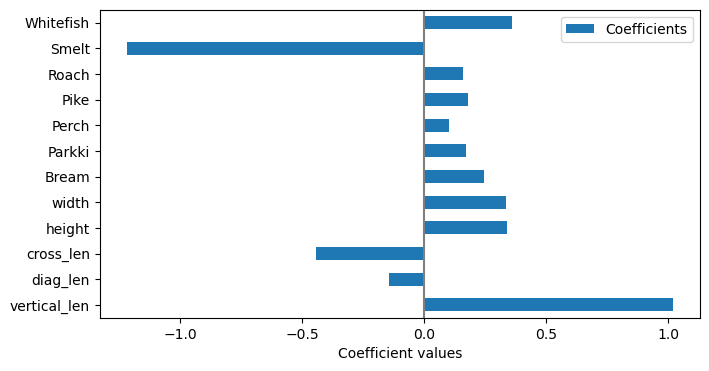

In [90]:
coefs.plot.barh(figsize=(10, 4))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

From this plot, we would infer that the most important factor in determining weight of a fish is whether it is a smelt and the next important factor is the vertical length of the fish. 

Comparing weight based on their magnitude to determine feature importance can be misleading if features vary widely, i.e., their variances/standard deviations are of different scale. However, we already standardize our dataset and eliminate this concern. Thus, it is relatively safe to make the inference above.

### VI. Prediction

In [91]:
y_predicted_train = model.predict(processed_X_train)
y_predicted_test = model.predict(processed_X_test)

y_predicted_train.shape, y_predicted_test.shape

((110,), (48,))

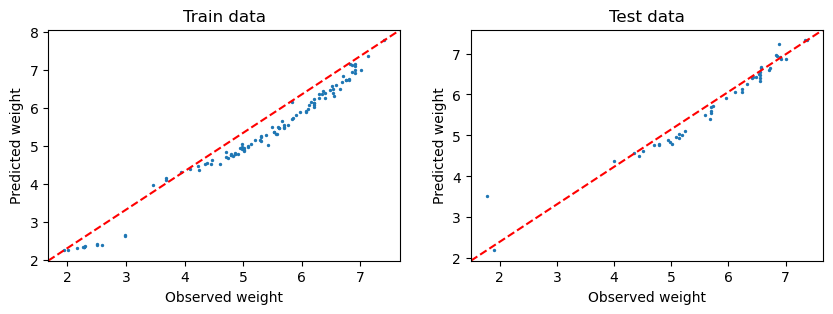

In [92]:
# let's compare our predicted weights to the observed weights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].scatter(y_train, y_predicted_train, s=2)
axes[0].set_title("Train data")
axes[1].scatter(y_test, y_predicted_test, s=2)
axes[1].set_title("Test data")

for ax in axes:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    ax.set(xlabel="Observed weight", ylabel="Predicted weight")

### VII. Model evaluation

We are interested in understanding how well the learned model generalizes. There are several metrics to quantify the quality of a model.

A typical measure for regression is the mean squared error
$$
MSE = \frac{1}{M} (y_{pred} - y_{obs})^2
$$

In [93]:
from sklearn.metrics import mean_squared_error

In [100]:
mse = mean_squared_error(y_test, y_predicted_test)
print("test MSE - ", mse)

test MSE -  0.08337805881422312


In [101]:
mse = mean_squared_error(y_train, y_predicted_train)
print("train MSE - ", mse)

train MSE -  0.028929778863924466


Another measure is $R^2$ score, which indicates a goodness of fit. More specifically, it represents the proportion of the response's variance that has been explained by the predictors. Best possible score is 1.

In [96]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_test, y_predicted_test)

0.9406249150716188

In [105]:
r2_score(y_train, y_predicted_train)

0.984169873200063

## <span style="color:rebeccapurple">Bias-Variance trade-off</span>


<div>
<center><img src="figures/bv.png" width="600"/>

 # <span style="color:rebeccapurple">Unsupervised learning</span>

Unsupervised learning learns patterns from unlabeled data.
   
An important method in unsupervised learning is cluster analysis. The goal of clustering is to group objects based on their similarities and uncover some patterns in the data. 

Clustering approaches can be classified into two categories:
- Hard clustering: a data point either belongs exclusively to a cluster, or doesn’t.
- Soft clustering: a probability score is assigned to data points to be in the clusters.

There isn't a clear criterion for good clustering. Your data are unlabeled, so there isn't any "gold standard" to compare your model performance against. Different clustering models use different metrics to group samples together. The choice of model will depend on your goal and data. 

Some popular models include:
- Connectivity: e.g. hierarchical clustering, which uses distance connectivity among data points
- Centroid: e.g. K-means clustering, which represents each cluster with a centroid, or single mean vector
- Distribution: e.g. Gaussian mixture model(GMM), which assumes data is composed of Guassian distributions
- Density: e.g. Density-Based Spatial Clustering of Applications with Noise (DBSCAN), which connects data points based on a density criteria (minimum number of objects within a radius)
- etc.

One thing you can consider when choosing models is the size of your dataset. Not all models scale effiiciently to large datasets. K-Means is one of the most popular algorithms and it is scale-efficient (scales linearly with the number of samples).

We are going to focus on K-Means clustering for this workshop. 

## <span style="color:rebeccapurple">K-means clustering</span>

The K-means algorithm divides the given dataset into a predefined $K$ number of clusters using Euclidean distance metric. The center of each cluster is called the centroid.

Thus, an important task in the algorithm is to find the $K$ centroids. Note: they may not necessarily be a member of the dataset.

The algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares (WCSS) criterion:
$$
\text{WCSS} = \sum_{i=1}^K \sum_{x_j \in C_i} || \bf{x}_j - \bf{\mu}_i|| ^2
$$

Suppose we want to divide the data below into 2 clusters, i.e. $K=2$.

<div>
<center><img src="figures/kmeans1.png" width="300"/>

#### Step 1: Initalize $K$ centroids

- Random approach: randomly pick $K$ data points from the dataset to be the initial centroids
- K-means++: radomly pick 1 data point to be the first centroid and find the rest based on maximum squared distance. Essentially, you want to keep the centroids as far away from another as possible. 

<div>
<center><img src="figures/kmeans2.png" width="300"/>

#### Step 2: Assign data points to the nearest cluster

Compute the (Euclidean) distance between point $x$ and the centroids and assign it to the nearest centroid.
<div>
<center><img src="figures/kmeans3.png" width="300"/>

#### Step 3: Re-initialize centroids 

Calculate the average of all data points in a cluster and take this as a new centroid. Do this for all of the clusters. Essentially the new centroid is computed by
$$
C_i = \frac{1}{N_i} \sum x_j
$$
where $x_j$ are the samples in cluster $i$ and $N_i$ is the number of samples.
<div>
<center><img src="figures/kmeans4.png" width="300"/>

Repeat Step 2 and 3.
<div>
<center><img src="figures/kmeans5.png" width="300"/>

When the assignments of data points to clusters stop changing after some number of iterations or we reach the maximum number of iterations, we can stop the algorithm.
<div>
<center><img src="figures/kmeans6.png" width="300"/>


Here is a nifty animation to show how KMeans iterations proceed and stabilize over time.

![pcagifurl](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

## <br><span style="color:rebeccapurple">Let's code!</span>

Let's look at our penguins data again

### <span style="color:teal"> Data selection

In [108]:
df =pd.read_csv("data/penguins.csv")

In [109]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [110]:
df.groupby("species").count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,146,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119,119


In [113]:
df.groupby("sex").count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,,,
female,165,165,165,165,165,165,165
male,168,168,168,168,168,168,168


Let's simplify the problem by only taking one sex, and only the numerical columns.

In [114]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [117]:
data = df.loc[df['sex']=="male", ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'species']]
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie
6,39.2,19.6,195.0,4675.0,Adelie
8,38.6,21.2,191.0,3800.0,Adelie
9,34.6,21.1,198.0,4400.0,Adelie


### <span style="color:teal"> Preprocessing

Scaling is an important step in K-means clustering. Since the algorithm uses a distance measure to quantify similarities, scaling the data either to will improve the performance. 

In [118]:
data_ = data.drop(columns=["species"]) # drop the species category column

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_)

### <span style="color:teal"> Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [123]:
from sklearn.cluster import KMeans

In [126]:
model = KMeans(n_clusters=3, n_init = 20).fit(scaled_data)

### <span style="color:teal"> Model results

In [128]:
# Inertia: sum of squared distances of samples to their closest cluster center
model.inertia_

127.93318940056783

In [129]:
# Label: indicating which cluster a point belong to. There isn't any ordinal meaning to the value of the labels. They are indices of clusters.
model.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [130]:
# Cluster centers/centroids
model.cluster_centers_

array([[ 0.67633655, -1.16968595,  1.17446414,  1.19594291],
       [-1.05020682,  0.61889101, -0.83987709, -0.64422242],
       [ 0.92522652,  0.76137726, -0.33363998, -0.75590903]])

In [132]:
# compare to known labels
data.species

0         Adelie
4         Adelie
6         Adelie
8         Adelie
9         Adelie
         ...    
323    Chinstrap
325    Chinstrap
328    Chinstrap
330    Chinstrap
331    Chinstrap
Name: species, Length: 168, dtype: object

In [154]:
model.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [155]:
data["labels"]  = list(model.labels_)
data["labels"] = data["labels"].map({1:"Adelie", 0:"Gentoo", 2:"Chinstrap"})

In [157]:
data.tail()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,labels
323,50.2,18.8,202.0,3800.0,Chinstrap,Chinstrap
325,51.9,19.5,206.0,3950.0,Chinstrap,Chinstrap
328,55.8,19.8,207.0,4000.0,Chinstrap,Chinstrap
330,49.6,18.2,193.0,3775.0,Chinstrap,Chinstrap
331,50.8,19.0,210.0,4100.0,Chinstrap,Chinstrap


### <span style="color:teal"> Model performance

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [160]:
cm = confusion_matrix(data.species.values, data["labels"].values)

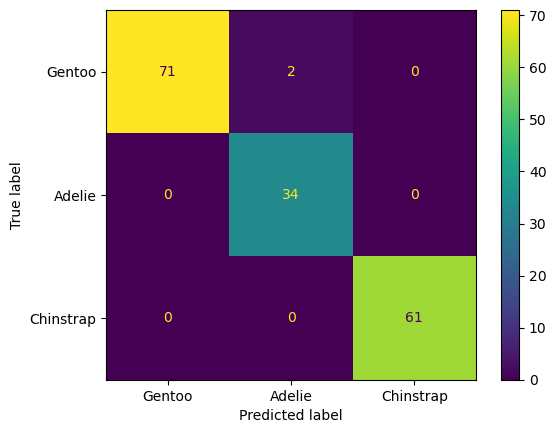

In [164]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Gentoo", "Adelie", "Chinstrap"])
disp.plot()
plt.show()

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(data.species.values, data["labels"].values)

0.9880952380952381